In [80]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from joblib import Parallel,delayed
from imblearn.under_sampling import CondensedNearestNeighbour,RepeatedEditedNearestNeighbours
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
import os
os.listdir()

['.config',
 'knn_train_test.png',
 'sm.png',
 'knn_bias.png',
 'rnn.png',
 'knn.png',
 'cnn.png',
 'waveform_data.csv',
 'sample_data']

In [82]:
data=pd.read_csv('waveform_data.csv',header=None)

In [83]:
data.head()
# Multi-Class Classification

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,1.08,4.20,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,2.81,1.61,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,0.51,1.45,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,4.65,4.05,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,4.82,4.79,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   int64  
dtype

Data is not imbalanced


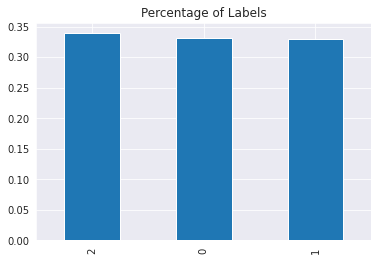

In [85]:
data[21].value_counts(normalize=True).plot(kind='bar')
plt.title("Percentage of Labels")
print("Data is not imbalanced")
# Same no of samples per class

In [86]:
y=data.pop(21)
#data=(data-data.mean())/data.std()

In [87]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=3)

# KNN

In [88]:
knn=KNeighborsClassifier(n_neighbors=56)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                     weights='uniform')

In [89]:
accuracy_score(y_test,knn.predict(x_test))

0.847

# What I have Done
> Divide the dataset in Train and test (4000 +1000).

> Divide the Train set in cv=5 parts.
> Choose any three out of the four (4C3) and then train KNN for [1....100] neighbours

## Tuning k using Cross-Validation

In [90]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_style('darkgrid')
k=list(range(1,100)) # List of all Neighbors 
accuracies=[]
variances=[]
# We are checking for every k the cross-validation accuracy.
# Calculating Accuracy using Cross-Validation.
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_train,y=y_train,cv=5,scoring="accuracy")
    accuracies.append(np.mean(c_v))
    variances.append(np.var(c_v))
    del c_v

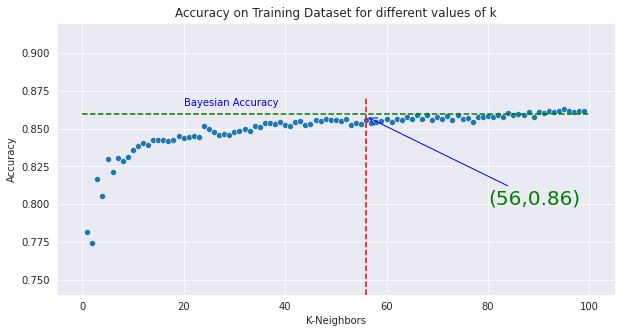

In [91]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=list(range(1,100)),y=accuracies)
plt.xlabel('K-Neighbors')
plt.ylabel("Accuracy")
plt.plot([56]*100,np.linspace(0.74,0.87,100),color='red',linestyle='--')
plt.annotate("(56,0.86)",xy=(56,0.858),xytext=(80,0.80),color='green',fontsize=20,arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='blue'))
plt.plot(np.linspace(0,100,100),[0.86]*100,color='green',linestyle='--')
plt.text(20,0.865,"Bayesian Accuracy",color='blue')
plt.ylim(0.74,0.92)
plt.title("Accuracy on Training Dataset for different values of k")
plt.savefig('knn.png') # Saving the png

Text(0.5, 1.0, 'Variances Accuracy on Waveforms Dataset for various k')

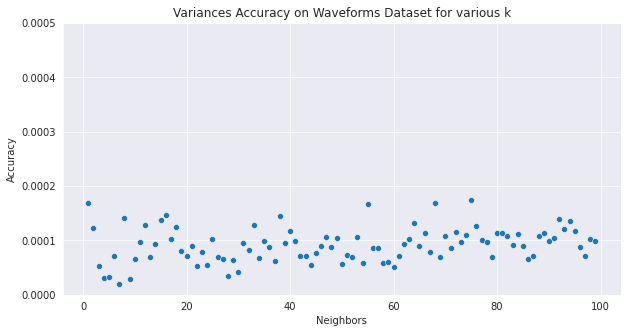

In [92]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=list(range(1,100)),y=variances)
plt.xlabel('Neighbors')
plt.ylabel("Accuracy")
#plt.plot([56]*100,np.linspace(0.74,0.87,100),color='red',linestyle='--')
#plt.plot(np.linspace(0,100,100),[0.86]*100,color='green',linestyle='--')
plt.ylim(0,0.0005)
plt.title("Variances Accuracy on Waveforms Dataset for various k")
#plt.savefig('knn.png') # Saving the png

In [93]:
history=pd.DataFrame({'Neighbours':k,'accuracies':accuracies})

In [94]:
history[history['accuracies']>=0.86]

,Neighbours,accuracies
83,84,0.86025
87,88,0.86100
89,90,0.86100
90,91,0.86050
91,92,0.86150
92,93,0.86100
93,94,0.86200
94,95,0.86275
95,96,0.86200
96,97,0.86075


# Bias Variance Trade Off

> We will analyze how bias and variance changes with the value of K and the number of training examples

In [95]:
training_examples=[100,200,500,1000,3000,3500] #Number of Training Examples
K=list(range(2,70)) # list of neighbors
TrainScore=[] #train scores for all training examples
TestScore=[] #test scores for all hypothesis trained on all te

for te in training_examples:
    train_te_score=[] # Train score for running te
    test_te_score=[] # Test score for hypothesis trained on running te
    for nb in K:
        knn=KNeighborsClassifier(n_neighbors=nb)
        temp_data=x_train.sample(te) # random sample
        temp_y=y_train.loc[temp_data.index] # Corresponding Labels
        """test_data=x_test.sample(te)
        test_y=y_test.loc[test_data.index]"""
        #Fitting the Model
        knn.fit(temp_data,temp_y)
        
        train_te_score.append(accuracy_score(temp_y,knn.predict(temp_data)))
        test_te_score.append(accuracy_score(y_test,knn.predict(x_test)))
        
        del temp_data,temp_y,knn
    
    TrainScore.append(train_te_score)
    TestScore.append(test_te_score)

# Observation of the following Plots

> Increasing the size of training samples 
1. Reduces the chance of overfitting.
2. $ \text{It proves}

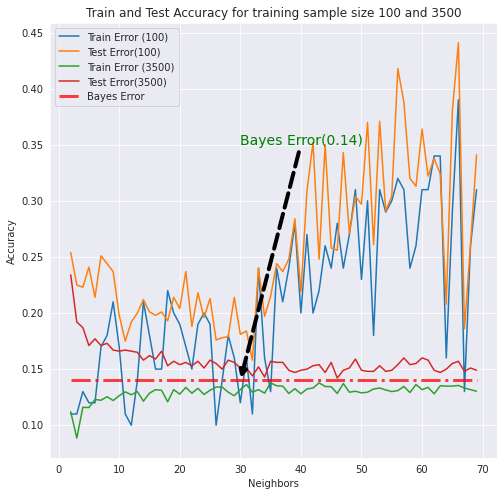

In [96]:
plt.figure(figsize=(8,8))
for i in range(len(TrainScore)):
    if i==0 or i==len(TrainScore)-1:
      plt.plot(K,[1-j for j in TrainScore[i]])
      plt.plot(K,[1-j for j in TestScore[i]])
      plt.xlabel("Neighbors")
      plt.ylabel("Accuracy")
plt.plot(K,[0.14]*len(K),color='red',linestyle='-.',linewidth=3,alpha=0.74)
plt.legend(["Train Error (100)","Test Error(100)","Train Error (3500)","Test Error(3500)","Bayes Error"])
plt.title(f"Train and Test Accuracy for training sample size 100 and 3500")
plt.ylim()
plt.annotate("Bayes Error(0.14)",xy=(30,0.14),xytext=(30,0.35),color='green',fontsize=14,arrowprops=dict(arrowstyle="->",
                              connectionstyle="arc3",color='black',linewidth='4',linestyle='--'))
plt.savefig(f"knn_train_test.png")

# Observation of the following Plots

> First plot :  High Bias and Low Variance (Overfitting).

> Next Plots: as we increase the training samples, bias and variance curve smooths down.

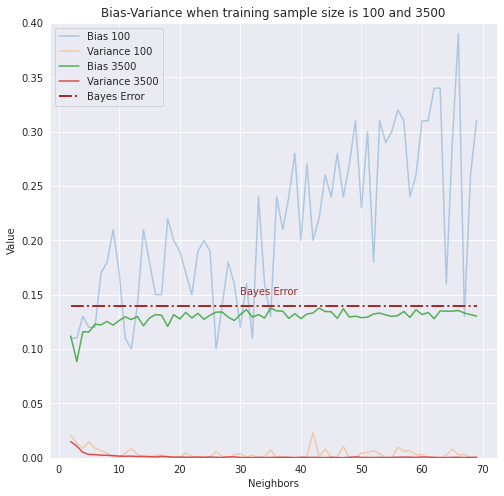

In [97]:
Bias=1-np.array(TrainScore)
Variance=(np.array(TrainScore)-np.array(TestScore))**2
plt.figure(figsize=(8,8))
for i in range(len(TrainScore)):
  if i==0 or i==len(TrainScore)-1:
    plt.plot(K,Bias[i],alpha=min(1,0.3+i/10))
    plt.plot(K,Variance[i],alpha=min(1,0.3+i/10))
plt.plot(K,[0.14]*len(K),color='brown',linestyle='-.',linewidth=2)
plt.text(30,0.15,"Bayes Error",color='brown')
plt.legend(["Bias 100","Variance 100",'Bias 3500','Variance 3500','Bayes Error'])
plt.title(f"Bias-Variance when training sample size is 100 and 3500")
plt.ylim(0,0.4)
plt.xlabel("Neighbors")
plt.ylabel("Value")
plt.savefig(f'knn_bias')

# Reducing Training Examples By CNN and RNN
> Condensed Nearest Neighbor and Reduced Nearest Neighbors

In [98]:
cnn=CondensedNearestNeighbour(n_seeds_S=4,n_neighbors=1,random_state=0)
x_cnn,y_cnn=cnn.fit_resample(x_train,y_train)

In [99]:
x_cnn=pd.DataFrame(x_cnn)
y_cnn=pd.DataFrame(y_cnn)

In [100]:
knn_cnn=KNeighborsClassifier(n_neighbors=30)
knn_cnn.fit(x_cnn,y_cnn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [101]:
accuracy_score(y_cnn,knn_cnn.predict(x_cnn))

0.8182305630026809

In [102]:
accuracy_score(y_test,knn_cnn.predict(x_test))

0.806

In [103]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_style('darkgrid')
k=list(range(1,100)) # List of all Neighbors 
accuracies_cnn=[]
# We are checking for every k the cross-validation accuracy.
# Calculating Accuracy using Cross-Validation.
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_cnn.values,y=y_cnn.values.reshape(-1),cv=5,scoring="accuracy")
    accuracies_cnn.append(np.mean(c_v))
    del c_v

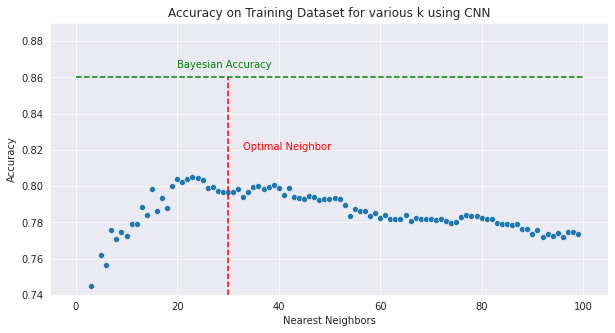

In [104]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=list(range(1,100)),y=accuracies_cnn)
plt.xlabel('Nearest Neighbors')
plt.ylabel("Accuracy")
plt.plot([30]*100,np.linspace(0.74,0.86,100),color='red',linestyle='--')
plt.plot(np.linspace(0,100,100),[0.86]*100,color='green',linestyle='--')
plt.text(20,0.865,"Bayesian Accuracy",color='green')
plt.text(33,0.82,"Optimal Neighbor",color='red')
plt.ylim(0.74,0.89)
plt.title("Accuracy on Training Dataset for various k using CNN")
plt.savefig('cnn.png') # Saving the png

In [105]:
from sklearn.metrics import f1_score

f1_score(y_test,knn_cnn.predict(x_test),average='micro')

0.806

In [107]:
y_cnn.value_counts()

1    1324
0     304
2     237
dtype: int64

In [108]:
len(x_cnn)

1865

In [109]:
print(f"After using CNN , reduction in data was {1-(len(x_cnn)/4000)}")

After using CNN , reduction in data was 0.53375


# Reduced Nearest Neighbors

> Based upon https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.294.4537&rep=rep1&type=pdf

In [110]:
knn_1=KNeighborsClassifier(n_neighbors=1)

In [111]:
knn_1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [112]:
def ReducedNearestNeighbors(data,label):
    total_index=list(data.index)
    
    for i,dt in enumerate(total_index):
        knn_1=KNeighborsClassifier(n_neighbors=1)
        knn_1.fit(data.drop(dt),label.drop(dt).values.reshape(-1)) # Removing the first datapoint.
        
        if accuracy_score(label,knn_1.predict(data))==1:
            data=data.drop(dt)
            label=label.drop(dt)
    return data,label

In [113]:
x_rnn,y_rnn=ReducedNearestNeighbors(x_cnn,y_cnn)

In [114]:
(len(y_train)-len(x_rnn))/4000

0.8215

In [115]:
y_rnn.value_counts()

1    335
0    247
2    132
dtype: int64

In [116]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=1000,random_state=12)

In [117]:
rnn=KNeighborsClassifier(n_neighbors=56)
rnn.fit(x_rnn,y_rnn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                     weights='uniform')

In [118]:
accuracy_score(y_test,rnn.predict(x_test))

0.807

In [119]:
accuracy_score(y_cnn,rnn.predict(x_cnn))

0.7876675603217158

In [120]:
accuracies_rnn_test=[]
accuracies_rnn_train=[]
k=list(range(1,100))
for i in k:
  rnn_test=KNeighborsClassifier(n_neighbors=i)
  rnn_test.fit(x_rnn.values,y_rnn.values.reshape(-1))
  accuracies_rnn_train.append(accuracy_score(y_rnn,rnn_test.predict(x_rnn)))
  accuracies_rnn_test.append(accuracy_score(y_test,rnn_test.predict(x_test)))

In [121]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_style('darkgrid')
k=list(range(1,100)) # List of all Neighbors 
accuracies_rnn=[]
variances_rnn=[]
# We are checking for every k the cross-validation accuracy.
# Calculating Accuracy using Cross-Validation.
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_rnn.values,y=y_rnn.values.reshape(-1),cv=5,scoring="accuracy")
    accuracies_rnn.append(np.mean(c_v))
    variances_rnn.append(np.std(c_v))
    del c_v

In [122]:
accuracies_rnn_test[18]

0.837

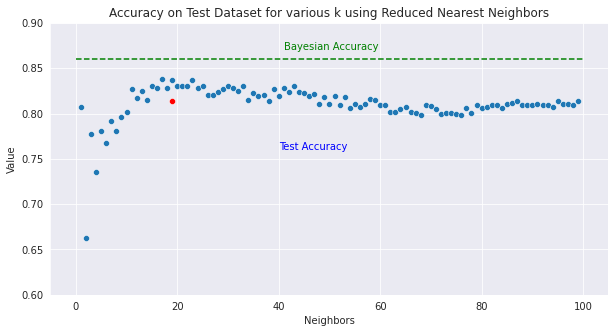

In [123]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=list(range(1,100)),y=accuracies_rnn_test)
#sns.scatterplot(x=list(range(1,100)),y=accuracies_rnn_train)
sns.scatterplot([19],[0.814],color='red')
plt.xlabel('Neighbors')
plt.ylabel("Value")
plt.text(40,0.76,'Test Accuracy',color='blue')
plt.plot(np.linspace(0,100,100),[0.86]*100,color='green',linestyle='--')
plt.text(41,0.87,'Bayesian Accuracy',color='green')
plt.ylim(0.6,0.9)
plt.title("Accuracy on Test Dataset for various k using Reduced Nearest Neighbors")
plt.savefig('rnn.png') # Saving the png

# Generating Aritificial Imbalancy

In [124]:
def smote(train_data,label_data,label):
    index=list(label_data[label_data==label].index)
    knn=KNeighborsClassifier()
    knn.fit(train_data,label_data)
    data_train=train_data
    data_y=label_data
    for i in range(200):
        temp=train_data[train_data.index==np.random.choice(index)]# Get any random value
        distance,neighbor=knn.kneighbors(temp,n_neighbors=10)[0:2]
        distance=distance[0][1:]
        neighbor=neighbor[0][1:]
        for n in neighbor:
             if label_data.iloc[n]==label:
                    ex_1=(temp+train_data.iloc[n])/2
                    data_train=pd.concat([data_train,ex_1])
                    data_y=pd.concat([data_y,pd.Series(label)])
    return data_train,data_y

In [125]:
new_data,new_y=smote(x_train,y_train,2)

In [126]:
new_y.value_counts()

2    2835
0    1325
1    1297
dtype: int64

### Fitting KNN

In [127]:
knn_sm=KNeighborsClassifier(n_neighbors=20)
knn_sm.fit(new_data,new_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [128]:
accuracy_score(new_y,knn_sm.predict(new_data))

0.8830859446582371

In [129]:
accuracy_score(y_test,knn_sm.predict(x_test))

0.811

In [130]:
from sklearn.metrics import f1_score

In [131]:
f1_score(y_test,knn_sm.predict(x_test),average='weighted')

0.8056935568920416

In [132]:
f1_score(new_y,knn_sm.predict(new_data),average='weighted')

0.8789907127407035

In [133]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_style('darkgrid')
k=list(range(1,100)) # List of all Neighbors 
accuracies_sm=[]
# We are checking for every k the cross-validation accuracy.
# Calculating Accuracy using Cross-Validation.
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=new_data,y=new_y,cv=5,scoring="accuracy")
    accuracies_sm.append(np.mean(c_v))
    del c_v

In [134]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_style('darkgrid')
k=list(range(1,100)) # List of all Neighbors 
f_score=[]
# We are checking for every k the cross-validation accuracy.
# Calculating Accuracy using Cross-Validation.
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=new_data,y=new_y,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))
    del c_v

In [135]:
accuracies_sm[:4], f_score[:4]

([0.8567060498316227,
  0.8568959149619095,
  0.8620194196271189,
  0.8655039735699681],
 [0.853378260129874,
  0.8562497130641015,
  0.8574216216110099,
  0.8628580912613361])

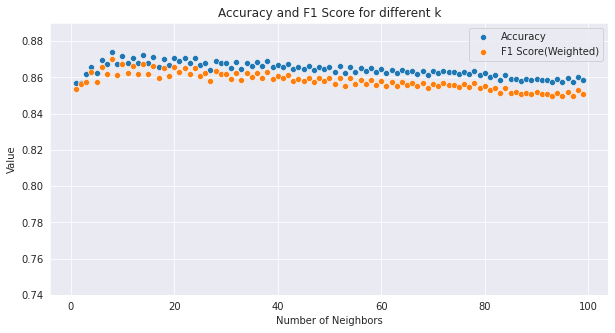

In [136]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=list(range(1,100)),y=accuracies_sm)
sns.scatterplot(x=list(range(1,100)),y=f_score)
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.ylim(0.74,0.89)
plt.title("Accuracy and F1 Score for different k")
plt.savefig('sm.png') # Saving the png
plt.legend(['Accuracy','F1 Score(Weighted)'])